In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

let's say we want to generate random numbers for a "right triangular" PDF, i.e. $P(x) \propto x$ for $x$ between 0 and 1, and zero everywhere else

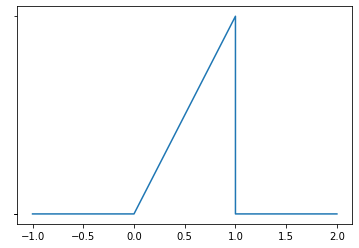

In [2]:
# plot to show the "right triangular" PDF
x=[-1,0,1,1,2]
y=[0,0,1,0,0]
plt.plot(x,y)
ticks=plt.yticks(y,' ')

First, what is expression for the properly normalized PDF?

<b>ANSWER HERE:</b> 

$\int_0^1 P(x) dx = 1 $ \
$\therefore P(x) = 2x$

We will generate the random deviates using the transformation method. What is the expression for the cumulative distribution function $C(x)$?


<b>ANSWER HERE:</b> 

$C(x) = \int_0^x P(x') ~dx' = \int_0^x 2x' ~dx' = x^2$

What is the expression for the inverse of the CDF, i.e. given $0<y<1$, what is x?

<B> ANSWER HERE: </B> 

$y = x^2$ \
$ \therefore x = \sqrt{y} = \sqrt{C(x)} $

Given this, write a routine to generate a random deviate in the desired function: generate a uniform deviate in the CDF, and transform it back to $x$

In [3]:
def triangle(size) :
    """ Generate size random deviates in a triangular PDF"""
    
    rands = np.random.uniform(0,1,size)
    x = np.sqrt(rands)
    return x



Use your routine to generate samples with different sizes and plot the histograms to validate your routine

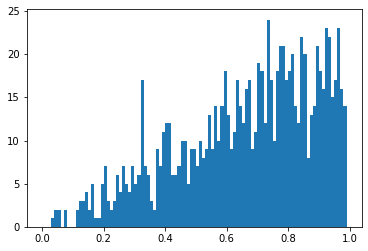

In [7]:
#generate sample using your routine and plot histogram

samp=triangle(size=1000)
plt.hist(samp,bins=np.arange(0,1,0.01))
plt.show()

OK, how about a triangular PDF, i.e one that is proportional to x for 0<x<1, and proportional to -x for 1<x<2?

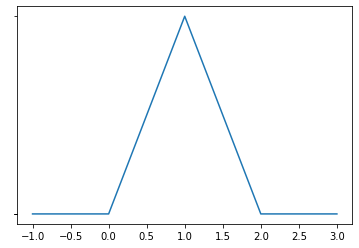

In [8]:
# show the "triangular" PDF
x=[-1,0,1,2,3]
y=[0,0,1,0,0]
plt.plot(x,y)
ticks=plt.yticks(y,' ')

Write the expression for the inverse of the cumulative distribution function


<B> ANSWER HERE: </B> 


$\int_0^2 P(x) dx =1$ \
$P(x) = x~ ;~0<x<1 $ \
$P(x) = 2-x~; ~1<x<2 $ 

$\therefore C(x) =  \frac{x^2}{2} ~; ~0<x<1 $ 

$ \therefore C(x) =  2x - \frac{x^2}{2} - 1 ~ ; ~1<x<2 $ 

$ x = \sqrt{2y}  ~ ;~0<x<1 $ 

$ x = 2 \pm \sqrt{2-2y}  ~ ;~1<x<2 $



    

In [13]:
def triangle(size) :
    """ routine to return random deviates in a triangular function"""

    r = np.random.uniform(0,1,size)
    lo, hi = np.where(r<0.5)[0], np.where(r>=0.5)[0]
    
    output = np.zeros(len(r))

    output[lo] = np.sqrt(2*r[lo]) 
    output[hi] = 2 + np.sqrt(2 + 2*r[hi]) 

 

    return output


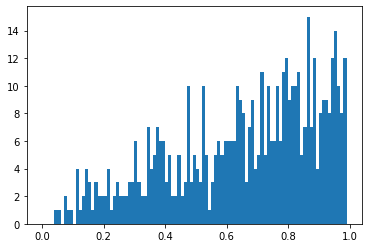

In [17]:
#generate and plot your deviates
samp=triangle(size= 1000) # fill in sample size
plt.hist(samp,bins=np.arange(0,1,0.01)) # fill in bin sizes
plt.show()

Now, write a routine to generate samples from a power law distribution, e.g., for an initial mass function of the form $P(M)\propto M^{-2.35}$ for $0.1 < M < 100$ (a Salpeter IMF). Start by getting the expressions for the normalized PDF, the CDF, and the inverse of the CDF

<B> ANSWER HERE: </B>

$\int_{0.1}^{100} P(M') dM' =1$ 

$\int_{0.1}^{100} AM'^{-1.35} dM' = 1$

$\therefore A =0.06 $

$\therefore P(M) = 0.06M^{-2.35}$


$C(M) = \int_0^M P(M') ~dM' = \int_0^M 0.06M'^{-2.35} ~dM'$

$\therefore C(M) = 0.044M^{-1.35} $

$ M = \left( \frac{C(M)}{0.044} \right)^{\frac{-1}{1.35}} $






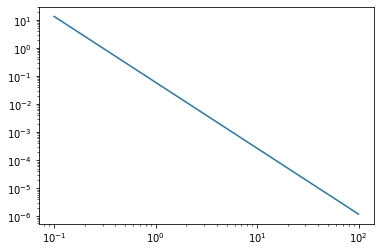

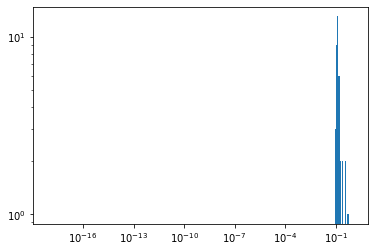

In [26]:
def pdf(x) :
    """routine to return normalized Salpeter IMF given input mass"""  
    
    pdf  = 0.06*x**(-2.35)
    return pdf
   
x=np.arange(0.1,100,0.1)

plt.figure()
plt.loglog(x,pdf(x))
plt.show()

def salpeter(size=1) :
    """ routine to generate a sample drawn from Salpeter IMF of input size"""
    r = np.random.uniform(0,1,size)
    M = (r/0.044)**(-1/1.35)
    return M
    
samp=salpeter(size=100)

plt.figure()
plt.hist(samp,bins=np.arange(0,1,0.01))
plt.xscale('log')
plt.yscale('log')
plt.show()

It is generally thought that the Salpeter IMF has too many faint stars. More realistic IMFs include those characterized by Kroupa et al, and by Chabrier et al. The Kroupa et al IMF is characterized by a 3-piece power law. The Chabrier IMF is charaterized by a lognormal distribution at masses less than a solar mass, and a power law above it. Write a routine to generate samples from one of these functions.

Kroupa IMF:

$\int P(M) dM =1$ \
$P(M) =  M^{-0.3} ~ ;~0.01 \leq M<0.08 $ \
$P(M) = M^{-1.3}~ ; ~0.08 \leq M<0.5 $ \
$P(M) = M^{-2.3}~ ;~ M \geq 0.5$ 

$P(M) = \int_{0.01}^{0.08} AM^{-0.3}~dM =[ A(1/0.7)M^{0.7} ]_{0.01}^{0.08} =1 $ \
$P(M) = -5.349M^{-0.3}$ 



CDF: \
$\int_0^M P(M') dM'$ 

$C(M) = \int_0^M  M'^{-0.3} ~ ;~0.01 \leq M<0.08 $






In [30]:
(0.01**0.7)/0.7 - (0.08**0.7)/0.7

-0.18694509028929948

In [31]:
1/-0.18694509028929948

-5.349164283761021

https://cds.cern.ch/record/486831/files/0102155.pdf

In [ ]:
def kroupa(size):
    """ routine to generate a sample drawn from Kroupa IMF of input size"""
    r = np.random.uniform(0,1,size)
    M = 
    return M
    
samp=kroupa(size=100)
 

How about a routine to generate a galaxy luminosity using a Schechter luminosity function?

https://www.astro.umd.edu/~richard/ASTRO620/LumFunction-pp.pdf

In [20]:
def schechter_luminosity(phi_star,L,L_star,alpha):
    func = (phi_star/L)*((L/L_star)^alpha)*np.exp(-L/L_star)
    return func